In [206]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/test.csv
/kaggle/input/mobile-price-classification/train.csv


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
pd.set_option('display.max_columns', None)

In [209]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

df.head()

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


By looking at the count of each column its evident that there are no missing values.

In [210]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [211]:
df.shape

(2000, 21)

# Data Analysis

We will create a correlation plot in order to understand the correlation between the features.

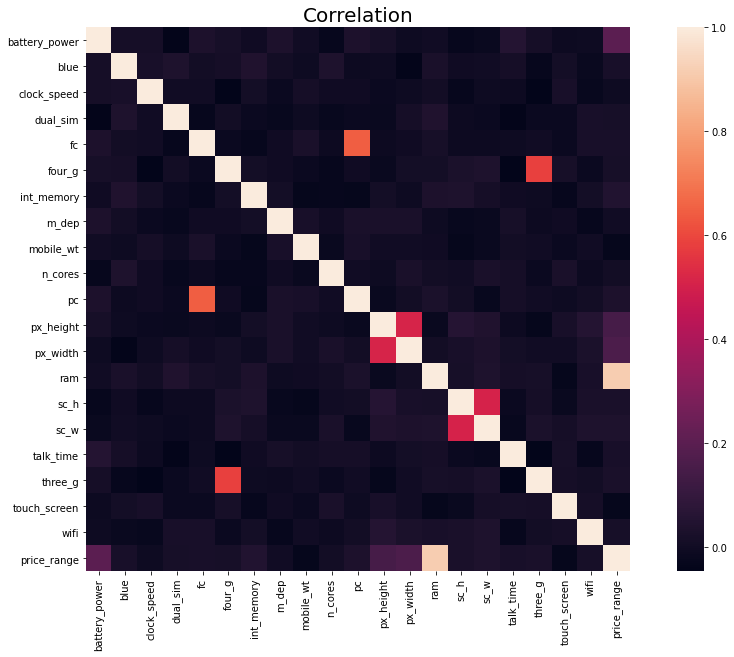

In [212]:
plt.figure(figsize = (17,10))
corrmat = df.corr()
sns.heatmap(corrmat, square = True)
plt.title('Correlation', fontsize = 20)
plt.show()

Our Price Range has strong correlation with RAM.

Also

* 3G and 4G
* pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
* px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
* sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

In [213]:
#price range correlation
corrmat.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

# Data Visualization

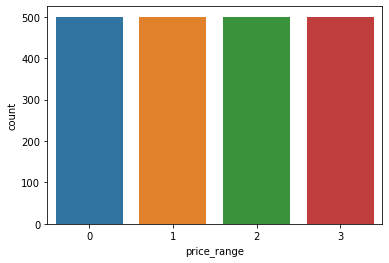

In [214]:
sns.countplot(x = "price_range", data = df)
plt.show()

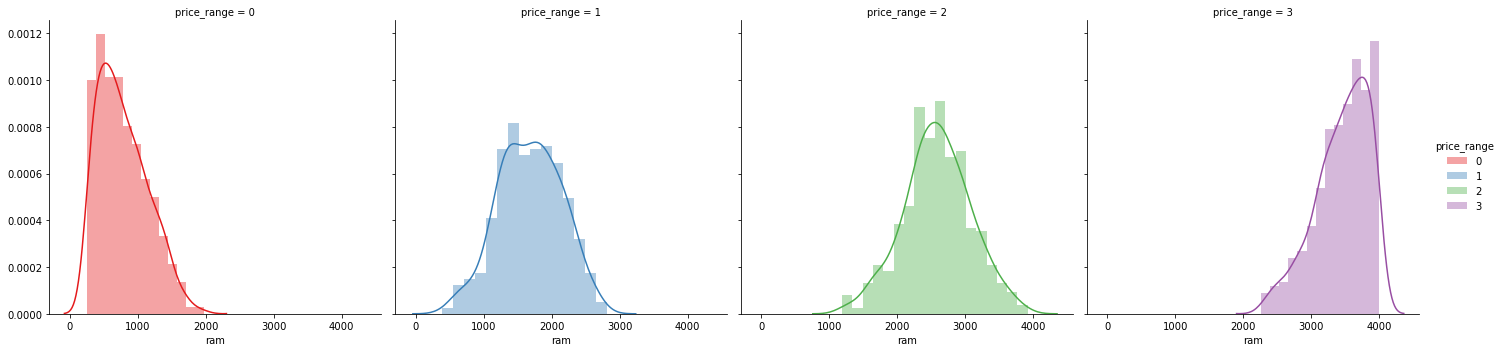

In [215]:
g = sns.FacetGrid(df, col="price_range", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

This is a positive co - relationship.

There are 4 types of price range:

* Type 1(low cost): RAM ranges between 0 to 2000 megabytes
* Type 2(medium cost):  RAM ranges between 0 to 3000 megabytes
* Type 3(high cost): RAM ranges between 1000 to 4000 megabytes
* Type 4(very high cost): RAM ranges between 2000 to 4000 megabytes

### **Battery Power - RAM and Price Range**

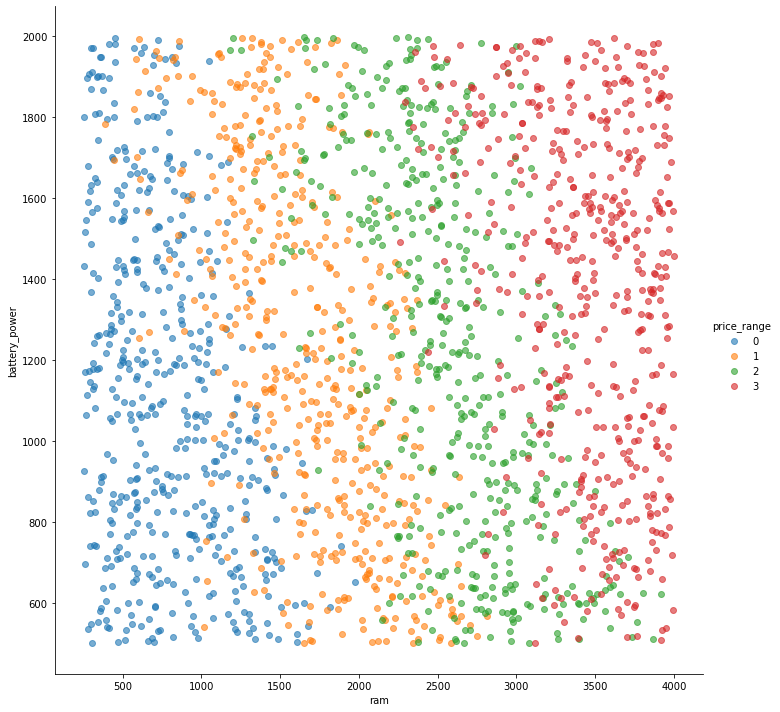

In [216]:
g = sns.FacetGrid(df,hue = 'price_range', height = 10)
g.map(plt.scatter, 'ram','battery_power',alpha = 0.6)
g.add_legend()


### **3G - RAM and Price Range**

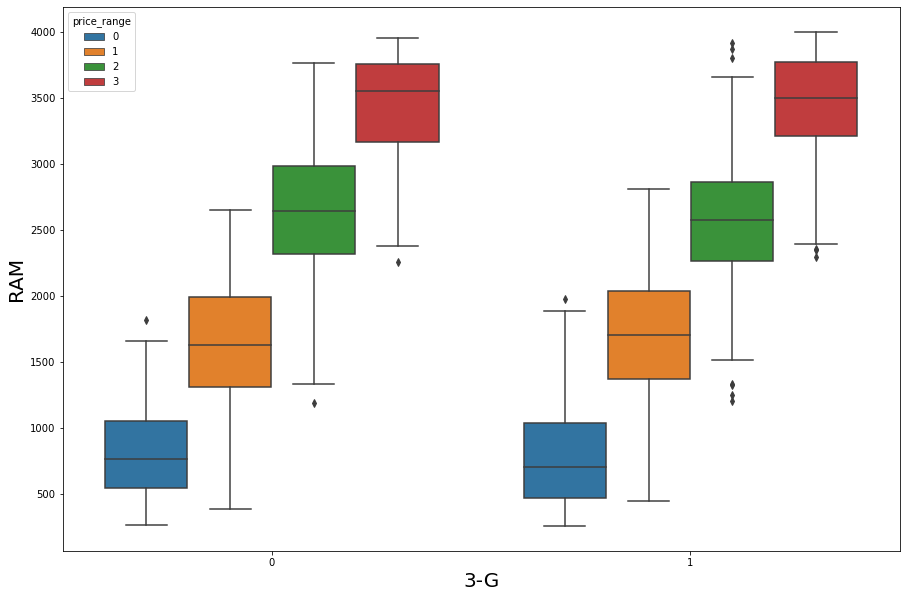

In [217]:
plt.figure(figsize = (15,10))
sns.boxplot(x="three_g", y="ram", hue = "price_range", data = df)
plt.xlabel("3-G", fontsize = 20)
plt.ylabel("RAM", fontsize = 20)

plt.show()

0 - Not 3G

1- Has 3G

### **4G - RAM and Price Range**

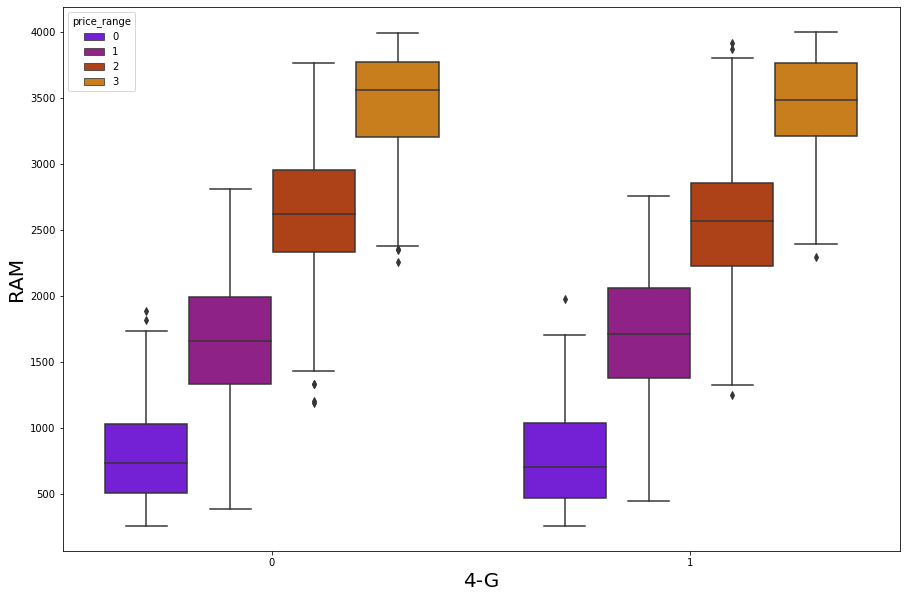

In [218]:
plt.figure(figsize = (15,10))
sns.boxplot(x="four_g", y="ram", hue = "price_range", data = df, palette = "gnuplot")
plt.xlabel("4-G", fontsize = 20)
plt.ylabel("RAM", fontsize = 20)

plt.show()

0 - Not 4G

1- Has 4G

### **Internal Memory - RAM and Price Range**

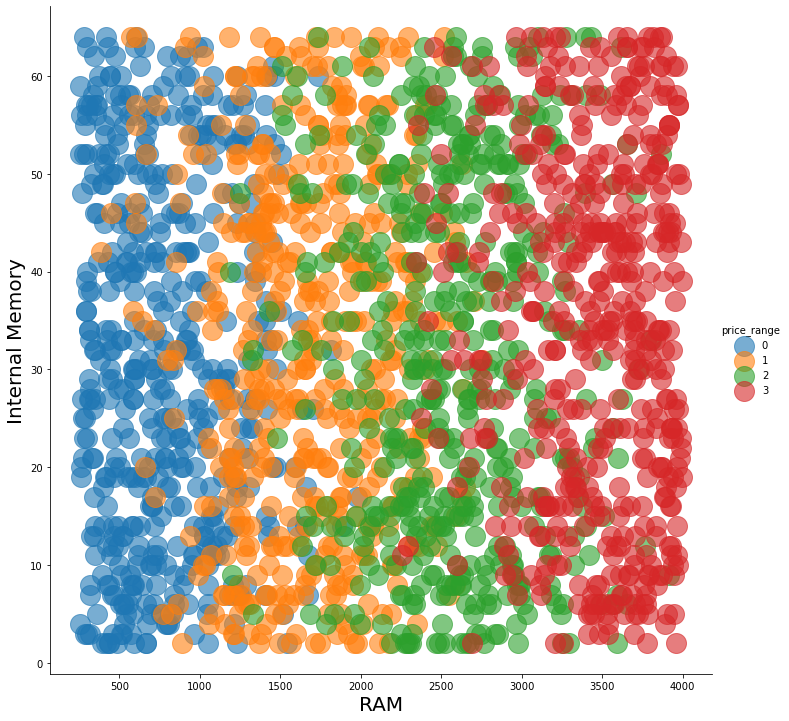

In [219]:
g = sns.FacetGrid(df,hue = 'price_range', height = 10)
g.map(plt.scatter, 'ram','int_memory',alpha = 0.6, s = 400)
plt.xlabel("RAM", fontsize = 20)
plt.ylabel("Internal Memory", fontsize = 20)

g.add_legend()
plt.show()


Internal Memory has a distinct relationship with RAM and Price Range.

### **Dual SIM - RAM and Price Range**

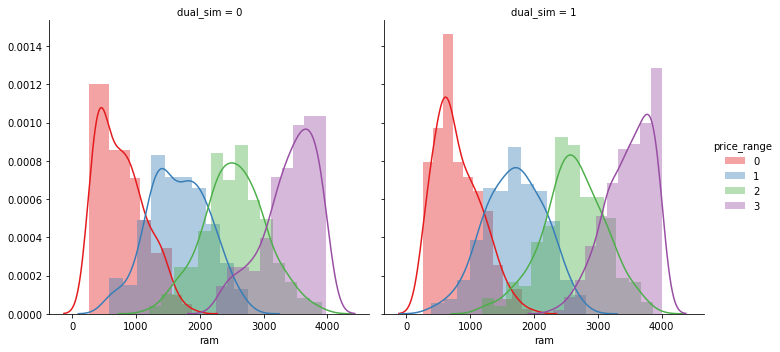

In [220]:
g = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

### **Face Camera Pixels - RAM and Price Range**

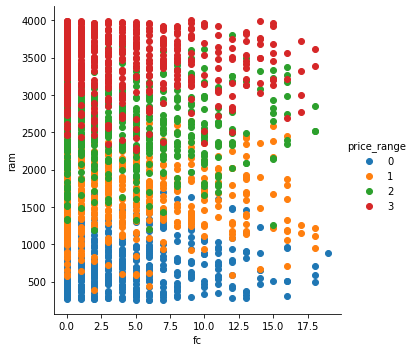

In [221]:
g = sns.FacetGrid(df, hue = "price_range", height = 5)
g = (g.map(plt.scatter, "fc","ram").add_legend())

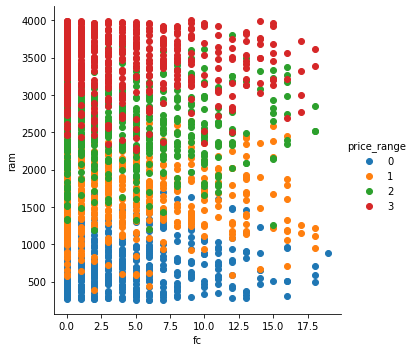

In [222]:
g = sns.FacetGrid(df, hue = "price_range", height = 5)
g = (g.map(plt.scatter, "fc","ram").add_legend())

# Prediction Models

In [223]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [224]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [225]:
X = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y = df['price_range']

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

## Random Forest Classification

### Random Forest Classification without feature engineering

In [227]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 70, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8766666666666667

In [228]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 70, criterion = 'gini', random_state = 42)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8783333333333333

'gini' criterion gives better accuracy of **87.83%** by a small margin.

### Random Forest Classification with feature engineering

In [229]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_fc = sc.fit_transform(X_train)
X_test_fc = sc.transform(X_test)

In [230]:
from sklearn.ensemble import RandomForestClassifier
classifier_fe = RandomForestClassifier(n_estimators = 70, criterion = 'gini', random_state = 42)
classifier_fe.fit(X_train_fc, y_train)
classifier_fe.score(X_test_fc,y_test)

0.8783333333333333

In [231]:
#making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_fe.predict(X_test_fc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[143   7   0   0]
 [  8 131  11   0]
 [  0  18 114  18]
 [  0   0  11 139]]


0.8783333333333333

Even after feature scaling the result is **same 87.83%**, now let's try dropping unnecessary columns.

In [232]:
feature_list = list(df.columns)

In [233]:
# Get numerical feature importances
importances = list(classifier_fe.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: ram                  Importance: 0.46
Variable: battery_power        Importance: 0.07
Variable: px_height            Importance: 0.06
Variable: px_width             Importance: 0.06
Variable: int_memory           Importance: 0.04
Variable: mobile_wt            Importance: 0.04
Variable: clock_speed          Importance: 0.03
Variable: m_dep                Importance: 0.03
Variable: pc                   Importance: 0.03
Variable: sc_h                 Importance: 0.03
Variable: sc_w                 Importance: 0.03
Variable: talk_time            Importance: 0.03
Variable: fc                   Importance: 0.02
Variable: n_cores              Importance: 0.02
Variable: blue                 Importance: 0.01
Variable: dual_sim             Importance: 0.01
Variable: four_g               Importance: 0.01
Variable: three_g              Importance: 0.01
Variable: touch_screen         Importance: 0.01
Variable: wifi                 Importance: 0.01


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

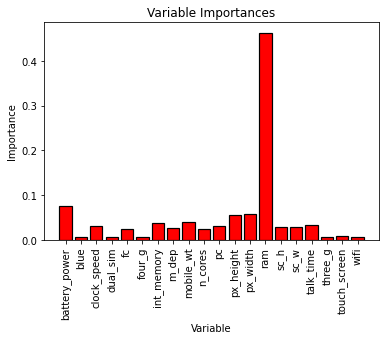

In [234]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

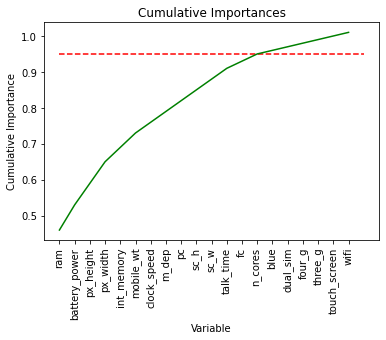

In [235]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [236]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 14


Now we will drop the least important features.

In [237]:
X_modified = df[['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

Training and evaluating on important features.

In [238]:
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_modified, y, test_size = 0.3, random_state = 42, stratify = y)

In [239]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_m = sc.fit_transform(X_train_m)
X_test_m = sc.transform(X_test_m)

In [240]:
from sklearn.ensemble import RandomForestClassifier
classifier_m = RandomForestClassifier(n_estimators = 80, criterion = 'gini', random_state = 42)
classifier_m.fit(X_train_m, y_train)
classifier_m.score(X_test_m,y_test)

0.885

In [241]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_m.predict(X_test_m)
cm_m = confusion_matrix(y_test, y_pred)
print(cm_m)
accuracy_score(y_test, y_pred)

[[145   5   0   0]
 [  5 129  16   0]
 [  0  17 116  17]
 [  0   0   9 141]]


0.885

There was a slight increase in accuracy after feature engineering, **from 87.83% to 88.50%**.

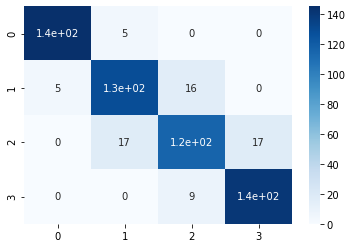

In [242]:
sns.heatmap(cm_m, annot = True,fmt='', cmap='Blues')

In [243]:
# # Performance metrics
# errors = abs(y_pred - y_test)
# print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / y_test)
# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

## KNN Classification

### KNN classification without feature engineering.

In [244]:
X = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y = df['price_range']

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [246]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.9333333333333333

In [247]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
accuracy_score(y_test, y_pred)

[[147   3   0   0]
 [  4 140   6   0]
 [  0   7 134   9]
 [  0   0  11 139]]


0.9333333333333333

Wow! We already have an accuracy of 93.33% without feature engineering which is better than Random Forest Classification. Now let's see with feature engineering.

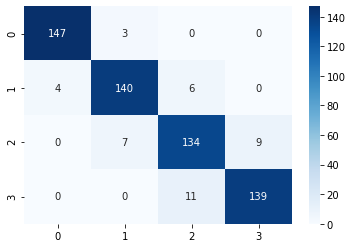

In [253]:
sns.heatmap(cm_knn, annot = True,fmt='', cmap='Blues')

### KNN classification with feature engineering.

In [249]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_fc = sc.fit_transform(X_train)
X_test_fc = sc.transform(X_test)

In [250]:
from sklearn.neighbors import KNeighborsClassifier
classifier_fc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_fc.fit(X_train_fc, y_train)
classifier_fc.score(X_test_fc,y_test)

0.4583333333333333

In [251]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_fc.predict(X_test_fc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[99 41 10  0]
 [52 51 41  6]
 [13 57 54 26]
 [ 1 27 51 71]]


0.4583333333333333

Okay so, only feature scaling will give a bad effect on our model, let's try dropping some unnecessary features now.

Training and evaluating for important features.

In [252]:
from sklearn.neighbors import KNeighborsClassifier
classifier_m_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_m_knn.fit(X_train_m, y_train)
classifier_m_knn.score(X_test_m,y_test)

0.59

After feature engineering we see a great decrement in the accuracy **from 93.33% to 59%**.